In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lstm_model/other/model/1/state_dict.pt
/kaggle/input/lstm_model/onnx/lstm_model/1/sentiment_lstm.onnx
/kaggle/input/combined-df/combined_df.pkl


import df

In [36]:
import pandas as pd
combined_df = pd.read_pickle('/kaggle/input/combined-df/combined_df.pkl')

In [37]:
import string
punc = string.punctuation

def remove_punctuation(text):
    lst = []
    text = text.lower()
    for word in text:
        if word not in punc:
            lst.append(word)
            
    x = lst[:]
    lst.clear()
    return "".join(x)


combined_df["text"] = combined_df["text"].apply(remove_punctuation)

combined_df

,text,sentiment
0,what a great day looks like dream,1
1,i feel sorry i miss you here in the sea beach,1
2,dont angry me,2
3,we attend in the class just for listening teac...,2
4,those who want to go let them go,2
...,...,...
2490,according f according to ed to a version a q...,2
2491,the am the plan complete plan to no to not but...,2
2492,uploading the uploading all is all my oh my ba...,0
2493,congratulations king congratulations you mis...,1


In [38]:
from nltk.corpus import stopwords
stop = stopwords.words("english")

def remove_stopwords(text):
    lst = []
    
    for word in text.split():
        if word not in stop:
            lst.append(word)
            
    x = lst[:]
    lst.clear()
    return " ".join(x)


combined_df["text"] = combined_df["text"].apply(remove_stopwords)
combined_df

,text,sentiment
0,great day looks like dream,1
1,feel sorry miss sea beach,1
2,dont angry,2
3,attend class listening teachers reading slide ...,2
4,want go let go,2
...,...,...
2490,according f according ed version quarter third...,2
2491,plan complete plan spend spend money show mone...,2
2492,uploading uploading oh bamboozle bamboozle pic...,0
2493,congratulations king congratulations miss guys...,1


In [39]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(text):
    words = word_tokenize(text)
    stemmed_words = [ps.stem(word) for word in words]
    return " ".join(stemmed_words)

combined_df["text"] = combined_df["text"].apply(stemming)
combined_df

,text,sentiment
0,great day look like dream,1
1,feel sorri miss sea beach,1
2,dont angri,2
3,attend class listen teacher read slide nonsenc,2
4,want go let go,2
...,...,...
2490,accord f accord ed version quarter third quart...,2
2491,plan complet plan spend spend money show money...,2
2492,upload upload oh bamboozl bamboozl pictur moti...,0
2493,congratul king congratul miss guy stupid guy f...,1


In [40]:
from collections import Counter
corpus = [word for text in combined_df['text'] for word in text.split()]
count_words = Counter(corpus)
sorted_words = count_words.most_common()

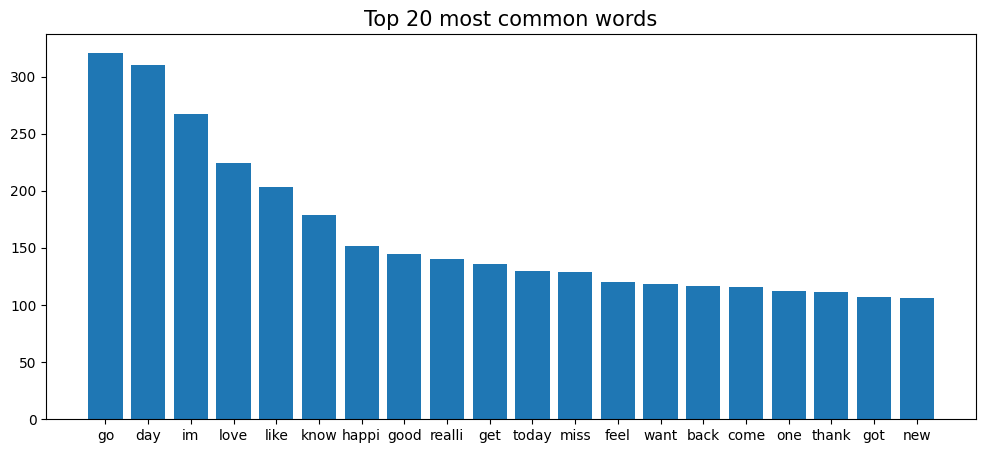

In [41]:
import matplotlib.pyplot as plt
keys = []
values = []
for key, value in sorted_words[:20]:
    keys.append(key)
    values.append(value)
    
plt.figure(figsize=(12, 5))
plt.bar(keys, values)
plt.title('Top 20 most common words', size=15)
plt.show()

In [42]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

reviews_int = []
for text in combined_df['text']:
    r = [vocab_to_int[word] for word in text.split()]
    reviews_int.append(r)

print(reviews_int[:1])
combined_df['Review int'] = reviews_int

[[41, 2, 38, 5, 394]]


In [43]:
review_len = [len(x) for x in reviews_int]
combined_df['Review len'] = review_len
combined_df

,text,sentiment,Review int,Review len
0,great day look like dream,1,"[41, 2, 38, 5, 394]",5
1,feel sorri miss sea beach,1,"[13, 43, 12, 300, 301]",5
2,dont angri,2,"[28, 395]",2
3,attend class listen teacher read slide nonsenc,2,"[256, 174, 89, 337, 396, 362, 598]",7
4,want go let go,2,"[14, 1, 40, 1]",4
...,...,...,...,...
2490,accord f accord ed version quarter third quart...,2,"[391, 393, 391, 1421, 448, 935, 778, 935, 1178...",22
2491,plan complet plan spend spend money show money...,2,"[126, 202, 126, 354, 354, 1144, 271, 1144, 1, ...",13
2492,upload upload oh bamboozl bamboozl pictur moti...,0,"[441, 441, 26, 1145, 1145, 277, 2424, 277, 489...",12
2493,congratul king congratul miss guy stupid guy f...,1,"[373, 697, 373, 12, 453, 332, 453, 135, 135, 2...",19


count    2495.000000
mean        8.860922
std         8.069931
min         0.000000
25%         4.000000
50%         6.000000
75%        11.000000
max        54.000000
Name: Review len, dtype: float64


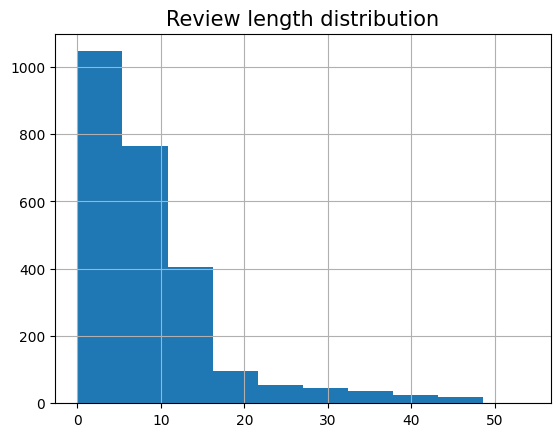

In [44]:
print(combined_df['Review len'].describe())

combined_df['Review len'].hist()
plt.title('Review length distribution', size=15)
plt.show()

In [45]:
def Padding(review_int, seq_len):
    '''
    Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_len), dtype = int)
    for i, review in enumerate(review_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)
            
    return features

In [46]:
import numpy as np
features = Padding(reviews_int, 50)
print(features[0, :])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  41   2  38   5 394]


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_remain, y_train, y_remain = train_test_split(features, combined_df['sentiment'].to_numpy(), test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=1)

In [48]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
# create tensor dataset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

# dataloaders
batch_size = 8

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [49]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([8, 50])
Sample input: 
 tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,   59,  390,   59,  779,   23,  641,   23,    2,
         2129,    2],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,  466,    3,   43,   26,   25,
           91,   92],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         

In [50]:
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.2):
        super(SentimentLSTM, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # LSTM layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,dropout=drop_prob, batch_first=True)
        
        # Dropout layer
        self.dropout = nn.Dropout(0.1)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
        
        # Softmax activation for multi-class classification
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        
        # Embedding and LSTM output
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        # Stack up LSTM outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # Dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # Softmax function
        soft_out = self.softmax(out)
        
        # Reshape into batch_size and output_size
        soft_out = soft_out.view(batch_size, -1, self.output_size)
        soft_out = soft_out[:, -1]
        
        return soft_out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        return hidden

# Hyperparameters
vocab_size = len(vocab_to_int) + 1
output_size = 3  # Three classes: 0, 1, 2
embedding_dim = 64
hidden_dim = 32
n_layers = 2
model = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(model)


SentimentLSTM(
  (embedding): Embedding(2429, 64)
  (lstm): LSTM(64, 32, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)


import model

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.load_state_dict(torch.load(r"/kaggle/input/lstm_model/other/model/1/state_dict.pt", map_location=device))
model.to(device)
model.eval()

SentimentLSTM(
  (embedding): Embedding(2429, 64)
  (lstm): LSTM(64, 32, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)

In [52]:
import torch.optim as optim
lr = 0.001

# Loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [53]:
# import torch.optim as optim
# import numpy as np
# import random

# def set_seed(seed):
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     np.random.seed(seed)
#     random.seed(seed)
#     torch.backends.cudnn.deterministic = True
#     torch.backends.cudnn.benchmark = False

# set_seed(42)

# # Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

# # Hyperparameters
# epochs = 10
# lr = 0.001
# clip = 5  # gradient clipping

# def accuracy(predictions, labels):
#     _, preds = torch.max(predictions, 1)
#     correct = preds.eq(labels.view_as(preds)).sum()
#     acc = correct.float() / preds.shape[0]
#     return acc

# # Loss và optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=lr)

# valid_loss_min = np.Inf

# # Training loop
# for epoch in range(epochs):
#     train_losses = []
#     train_accs = []
#     model.train()

#     for inputs, labels in train_loader:
#         # Move inputs and labels to the device
#         inputs, labels = inputs.to(device), labels.to(device)

#         # Khởi tạo trạng thái ẩn
#         h = model.init_hidden(inputs.size(0))
#         h = tuple([each.data for each in h])
#         model.zero_grad()

#         output, h = model(inputs, h)
#         loss = criterion(output, labels)
#         loss.backward()
#         nn.utils.clip_grad_norm_(model.parameters(), clip)
#         optimizer.step()

#         train_losses.append(loss.item())
#         train_accs.append(accuracy(output, labels).item())

#     val_losses = []
#     val_accs = []

#     model.eval()
#     with torch.no_grad():
#         for inputs, labels in valid_loader:
#             # Move inputs and labels to the device
#             inputs, labels = inputs.to(device), labels.to(device)

#             # Khởi tạo trạng thái ẩn
#             val_h = model.init_hidden(inputs.size(0))
#             val_h = tuple([each.data for each in val_h])
#             output, val_h = model(inputs, val_h)
#             val_loss = criterion(output, labels)
#             val_losses.append(val_loss.item())
#             val_accs.append(accuracy(output, labels).item())
    
    
#     # Print training/validation statistics
#     print(f"Epoch: {epoch+1}/{epochs}... "
#           f"Train Loss: {np.mean(train_losses):.6f}... "
#           f"Val Loss: {np.mean(val_losses):.6f}... "
#           f"Train Acc: {np.mean(train_accs) * 100:.2f}%... "  # Nhân accuracy với 100
#           f"Val Acc: {np.mean(val_accs) * 100:.2f}%")  # Nhân accuracy với 100

#     # Save model if validation loss has decreased
#     if np.mean(val_losses) <= valid_loss_min:
#         print(f'Validation loss decreased ({valid_loss_min:.6f} --> {np.mean(val_losses):.6f}). Saving model ...')
#         torch.save(model.state_dict(), 'state_dict.pt')
#         valid_loss_min = np.mean(val_losses)

#     print(25 * '==')


In [54]:
# # Get test data loss and accuracy

# test_losses = [] # track loss
# # num_correct = 0

# test_acc = 0.0

# def acc(pred,label):
#     pred = pred.argmax(1)
#     return torch.sum(pred == label.squeeze()).item()
# model.eval()
# # iterate over test data
# for inputs, labels in test_loader:

#     # Creating new variables for the hidden state, otherwise
#     # we'd backprop through the entire training history
#     # init hidden state
#     test_h = model.init_hidden(inputs.size(0))
#     test_h = tuple([each.data for each in test_h])

#     inputs, labels = inputs.to(device), labels.to(device)
#     inputs, labels = inputs.to(torch.int64), labels.long()

#     output, test_h = model(inputs, test_h)
    
#     # calculate loss
#     test_loss = criterion(output, labels)
#     test_losses.append(test_loss.item())
    
#     accuracy = acc(output,labels)
#     test_acc += accuracy


# # -- stats! -- ##
# # avg test loss
# print("Test loss: {:.3f}".format(np.mean(test_losses)))

# # accuracy over all test data
# test_acc = test_acc/len(test_loader.dataset)
# print("Test accuracy: {:.3f}%".format(test_acc*100))

# # epoch_test_acc = test_acc/len(test_loader.dataset)

In [55]:
import torch.nn.functional as F
def make_prediction(text):
    # Tiền xử lý text
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = stemming(text)

    # Chuyển đổi text thành dạng số
    text_int = []
    for word in text.split():
        if word in vocab_to_int:
            text_int.append(vocab_to_int[word])
        else:
            text_int.append(vocab_to_int['<UNK>']) # Xử lý từ không có trong vocab

    # Đệm text
    text_padded = Padding([text_int], 50)[0]
    # Convert the NumPy array to a PyTorch tensor
    text_tensor = torch.tensor(text_padded)

    # Move the tensor to the same device as the model
    text_tensor = text_tensor.to(device)
    # Dự đoán nhãn
    model.eval()
    with torch.no_grad():
        output, hidden = model(text_tensor.unsqueeze(0), model.init_hidden(1))
        probabilities = F.softmax(output, dim=1).squeeze()
        pred = output.argmax(dim=1).item()

    return pred, probabilities


In [56]:
def de_mapping(val):
    category_map = {
       0:'neutral',
        1:'positive',
        2:'negative'
     }
    return category_map.get(val,-1)

In [57]:
text = "This is a great movie!"
pred, probabilities = make_prediction(text)
print(f"Predicted label: {pred} - {de_mapping(pred)}")
print(f"Prediction probabilities: {probabilities}")

Predicted label: 1 - positive
Prediction probabilities: tensor([0.2121, 0.5758, 0.2121], device='cuda:0')


In [58]:
text = 'Always somewhere I miss you where I have been'
pred, probabilities = make_prediction(text)
print(f"Predicted label: {pred} - {de_mapping(pred)}")
print(f"Prediction probabilities: {probabilities}")

Predicted label: 0 - neutral
Prediction probabilities: tensor([0.5761, 0.2119, 0.2120], device='cuda:0')


In [59]:
text = 'i want to drink water'
pred, probabilities = make_prediction(text)
print(f"Predicted label: {pred} - {de_mapping(pred)}")
print(f"Prediction probabilities: {probabilities}")

Predicted label: 0 - neutral
Prediction probabilities: tensor([0.5669, 0.2139, 0.2193], device='cuda:0')


In [60]:
text = 'We attend in the class just for listening teachers reading on slide. Just Nonsence'
pred, probabilities = make_prediction(text)
print(f"Predicted label: {pred} - {de_mapping(pred)}")
print(f"Prediction probabilities: {probabilities}")

Predicted label: 2 - negative
Prediction probabilities: tensor([0.2120, 0.2120, 0.5761], device='cuda:0')


In [61]:
text = 'I dont care, who are you and what can you do'
pred, probabilities = make_prediction(text)
print(f"Predicted label: {pred} - {de_mapping(pred)}")
print(f"Prediction probabilities: {probabilities}")

Predicted label: 2 - negative
Prediction probabilities: tensor([0.2120, 0.2120, 0.5760], device='cuda:0')


In [62]:
text = '2 am feedings for the baby are fun when he is all smiles and coos'
pred, probabilities = make_prediction(text)
print(f"Predicted label: {pred} - {de_mapping(pred)}")
print(f"Prediction probabilities: {probabilities}")

Predicted label: 1 - positive
Prediction probabilities: tensor([0.2119, 0.5761, 0.2119], device='cuda:0')


In [64]:
text = 'What a beautiful day !!! it looks like a dream.	'
pred, probabilities = make_prediction(text)
print(f"Predicted label: {pred} - {de_mapping(pred)}")
print(f"Prediction probabilities: {probabilities}")

Predicted label: 1 - positive
Prediction probabilities: tensor([0.2119, 0.5761, 0.2119], device='cuda:0')


In [65]:
text = 'Those who want to go there, let them leave'
pred, probabilities = make_prediction(text)
print(f"Predicted label: {pred} - {de_mapping(pred)}")
print(f"Prediction probabilities: {probabilities}")

Predicted label: 2 - negative
Prediction probabilities: tensor([0.2120, 0.2120, 0.5760], device='cuda:0')


In [63]:
text = 'the biggest dissappoinment in my life came out a year ago fuck borderlands 3'
pred, probabilities = make_prediction(text)
print(f"Predicted label: {pred} - {de_mapping(pred)}")
print(f"Prediction probabilities: {probabilities}")

KeyError: '<UNK>'